In [2]:
!pip install pandas matplotlib openpyxl statsmodels


C:\Users\Pawani Chaudhary\AppData\Local\Temp\ipykernel_4960\3206240589.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(r"C:\Users\Pawani Chaudhary\Desktop\order_details.csv", parse_dates=['order_date'])
C:\Users\Pawani Chaudhary\AppData\Local\Temp\ipykernel_4960\3206240589.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['order_date'].dt.to_period('M')
C:\Users\Pawani Chaudhary\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\

         order_id customer_id order_date sku_code   price  quantity  \
0  ODR1111336599a    C993531L 2022-02-23  P569750   62002         1   
1  ODR1116457650x    C517907L 2022-10-08  P320550  159500         1   
2  ODR1119282607l    C192625L 2021-08-07  P146984  919300         1   
3  ODR1119964698b    C225180L 2021-08-11  P523149   59856         1   
4  ODR1120310291y    C708473L 2021-09-18  P692619   34510         1   

   totalamount  discount  amount_paid  is_active  is_returned  is_cancelled  \
0      62002.0       0.0      62002.0          1            0             0   
1     159500.0       0.0     159500.0          1            1             1   
2     919300.0       0.0     919300.0          1            0             0   
3      59856.0       0.0      59856.0          1            1             1   
4      34510.0       0.0      34510.0          1            1             1   

   payment_type  
0             5  
1             1  
2             8  
3             1  
4       

C:\Users\Pawani Chaudhary\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pawani Chaudhary\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Q2 2023 Sales Forecast:
2023-04    1.510822e+08
2023-05    1.817767e+08
2023-06    2.048000e+08
Name: predicted_mean, dtype: float64


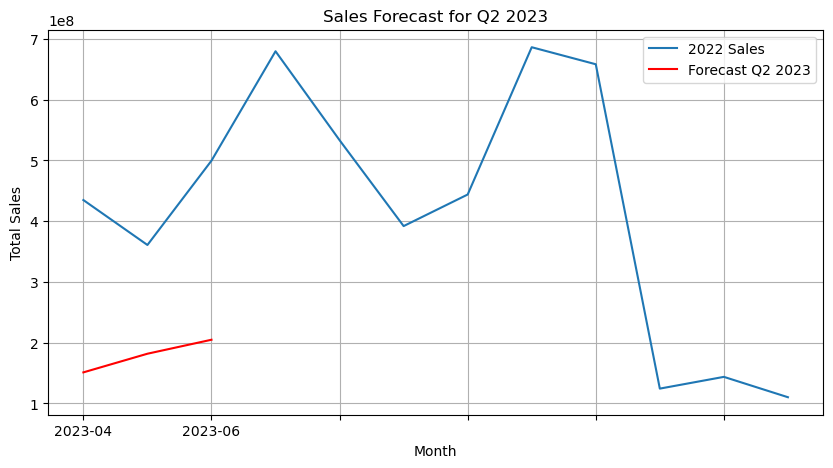

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 🔹 Load Excel file (ensure it's in the same folder or provide full path)


df = pd.read_csv(r"C:\Users\Pawani Chaudhary\Desktop\order_details.csv", parse_dates=['order_date'])
print(df.head())


# 🔹 Filter data for 2022 only
df_2022 = df[(df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31')]

# 🔹 Group by month and sum total sales
df_2022['month'] = df_2022['order_date'].dt.to_period('M')
monthly_sales = df_2022.groupby('month')['totalamount'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

# 🔹 Prepare time series
ts = monthly_sales.set_index('month')['totalamount']

# 🔹 Fit ARIMA model
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()

# 🔹 Forecast next 3 months (Q2 2023)
forecast = model_fit.forecast(steps=3)
forecast.index = ['2023-04', '2023-05', '2023-06']

# 🔹 Show forecasted values
print("Q2 2023 Sales Forecast:")
print(forecast)

# 🔹 Plot actual sales and forecast
ts.plot(label='2022 Sales', figsize=(10,5))
forecast.plot(label='Forecast Q2 2023', color='red')
plt.title('Sales Forecast for Q2 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Combine original sales and forecast correctly
combined = pd.concat([ts, forecast])
combined.index.name = 'month'
combined.name = 'predicted_sales'

# Export to Excel
combined.to_excel("Q2_2023_forecast.xlsx")

# Or export to CSV
combined.to_csv("Q2_2023_forecast.csv")

